# Trennen von überlagerten Normalverteilungen

## Anwendungsfall: Unterscheiden zw. Männern und Frauen

Angenommen ein Bekleidungshändler merkt, dass eine seiner Männerjacken hin und wieder auch von Frauen gekauft wird. Er würde gerne wissen, wie hoch der Anteil an Frauen an der Gesamtkäuferzahl ist, um daraus dann das weitere Vorgehen abzuleiten (z.B.: Lohnt es sich die jacke in Frauenkatalogen vorzustellen oder nicht?)

Die Frage ist - können wir ihm die Antwort liefern, wenn alles was wir haben, die Anzahl der gekauften Jacken pro Kleidergröße ist?

<br>

Ein Diagramm mit Verkaufszahlen, bei dem 33% der Käufer Frauen waren, würde etwa so aussehen:

<br>

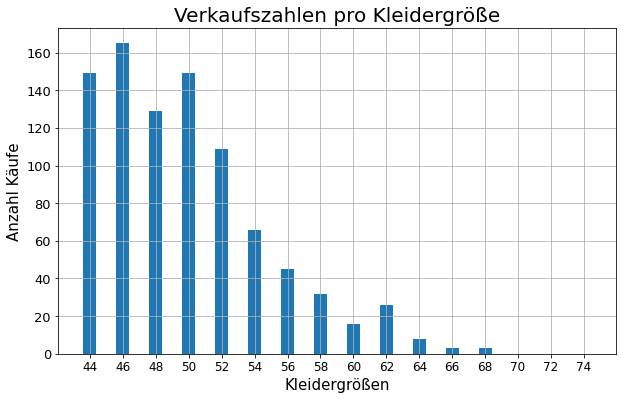

Aber wie könnten wir daraus ableiten, dass der Anteil an Frauen tatsächlich 33% gewesen ist?

## Lösungsansatz:

Wir können uns zunutze machen, dass Körpergrößen, und damit auch Kleidergrößen, bei Frauen und Männern normalverteilt sind.

## 1. Berechnen der Normalverteilungen der Körpergrößen

Wir wollen zunächst einmal eine realistische Verteilung von Verkaufszahlen generieren, an der wir nsere Lösungsansätze testen können. Dazu brauchen wir als erstes Daten zur Häufigkeit der einzelnen Körpergrößen.

Wir können z.B. diese Tabelle aus Wikipedia nehmen:

##### Normalverteilung der Körpergrößen der Deutschen in Abhängigkeit vom Geschlecht (Stand 2006)
Quelle:  https://de.wikipedia.org/wiki/K%C3%B6rpergr%C3%B6%C3%9Fe_eines_Menschen#cite_note-24
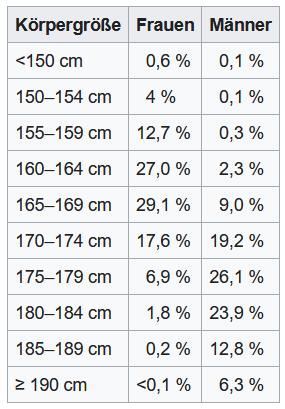
<br>



Daraus können wir jeweils für die Frauen und Männer den Erwartungswert und die Varianz bestimmen:


Frauen: Erwartungswert = 165.7, Varianz = 6.6
Männer: Erwartungswert = 177.2, Varianz = 6.5



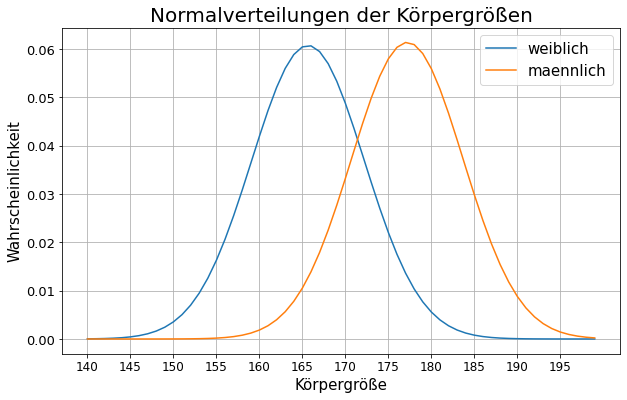

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# extract data from the table above
heights_females = [152]*40 + [157]*127 + [162]*270 +  [167]*291 + [172]*176 + [177]*69 + [182]*18 + [187]*2
heights_males = [152]*1 + [157]*3 + [162]*23 +  [167]*90 + [172]*192 + [177]*261 + [182]*239 + [187]*128

# calculate mean and variance for both sexes
mean_f, variance_f = norm.fit(heights_females)
mean_m, variance_m = norm.fit(heights_males)

# print results
print()
print("Frauen:", f"Erwartungswert = {round(mean_f, 1)},",f"Varianz = {round(variance_f, 1)}")
print("Männer:", f"Erwartungswert = {round(mean_m, 1)},",f"Varianz = {round(variance_m, 1)}")
print()

# plot both normal distributions
x_axis = np.arange(140, 200, 1)
plt.figure(figsize=(10, 6))
plt.title("Normalverteilungen der Körpergrößen", size=20)
plt.xlabel('Körpergröße', size=15)
plt.ylabel('Wahrscheinlichkeit', size=15)
plt.plot(x_axis, norm.pdf(x_axis, mean_f, variance_f), label="weiblich")
plt.plot(x_axis, norm.pdf(x_axis, mean_m, variance_m), label="maennlich")
plt.xticks(np.arange(140, 200, 5),size=12)
plt.yticks(size=13)
plt.legend(fontsize=15)
plt.grid()
plt.show()

## 2. Generieren normalverteilter Verkaufszahlen
Mit Hilfe der berechneten Werte können wir uns jetzt normalverteilte Kundengruppen aus Frauen und Männern generieren. Diese Kundengruppen sollen die Käufer unserer Jacke repräsentieren.

Zum Testen generieren wir uns erstmal eine Verteilung der Käufer mit einem Frauenanteil von 33% bzw. mit 200 Frauen und 400 Männern:

Diesen orden wir anhand einer wieteren Tabelle aus Wikipedia gemäß ihren Körpergrößen Kleidergrößen zu.

<br><br>

Quelle:  https://de.wikipedia.org/wiki/Konfektionsgr%C3%B6%C3%9Fe
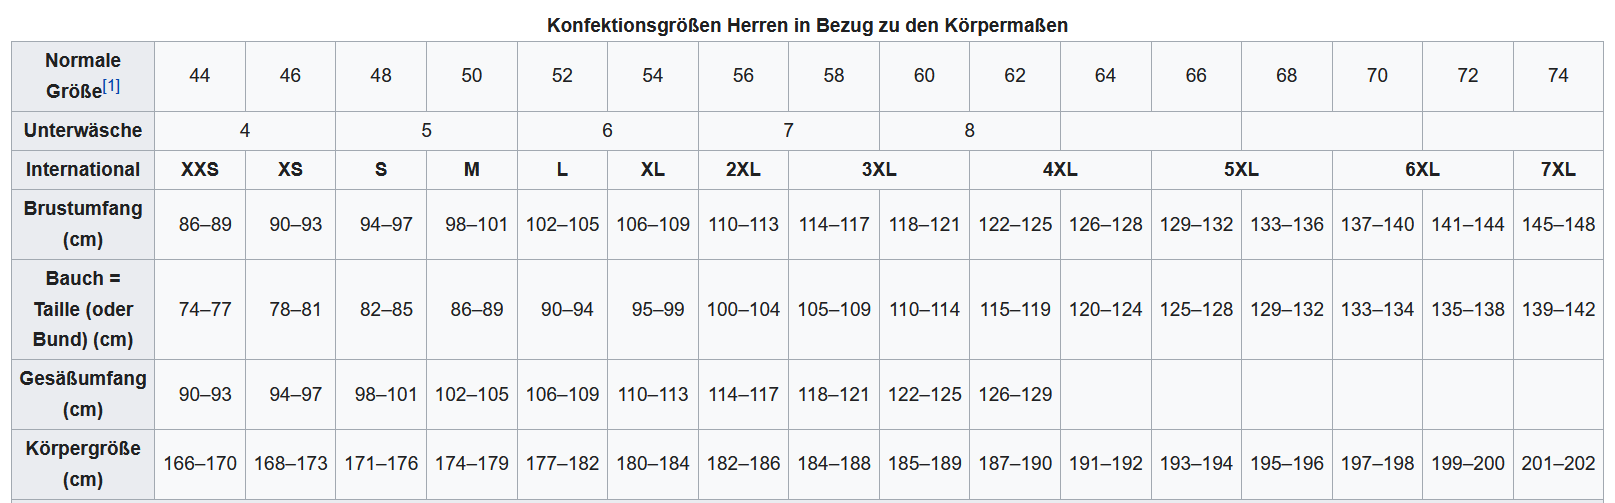

<br><br>

Dabei machen wir die folgenden Annahmen:
- Jeder Käufer hat eine Jacke gekauft
- Jeder Käufer hat die Jacke nur einmal gekauft
- Jeder Käufer hat die Jacke für sich persönlich gekauft
- Jeder Käufer hat die Jacke in der Größe gekauft, die ihm anhand der Größenabelle passt


Männer und Frauen unter 166cm und über 202cm finden dabei keine Jacke, die ihnen passt und werden nicht berücksichtigt.
Außerdem werden die Körpergrößenbereiche der Kleidungsgrößen angepasst (verkleinert) um die Überschneidungen zu entfernen.

In [114]:
import pandas as pd


amount_m = 600
amount_f = 300

heights_customers = []

# taking 200 times a random height from a normal distribution of heights for men
# removing heights below 166cm and above 202cm
count = 0
while count < amount_m:
    height = np.random.normal(mean_m, variance_m, 1).round(2)[0]
    if (166 <= height < 202):
        heights_customers.append(height)
        count += 1

# taking 100 times a random height from a normal distribution of heights for woman
# removing heights below 166cm and above 202cm
count = 0
while count < amount_f:
    height = np.random.normal(mean_f, variance_f, 1).round(2)[0]
    if (166 <= height < 202):
        heights_customers.append(height)
        count += 1

# putting the height-values into a table
df = pd.DataFrame()
df["height"] = heights_customers

# assigning the respective clothing size to each height
height_ranges_per_size = [166,169,172,175,178,181,183,185,186.5,188,190.5,192.5,194.5,196.5,198.5,200.5,202]
df["clothing_size"] = pd.cut(df.height, height_ranges_per_size, right=False, labels=range(44,75,2))

df

,height,clothing_size
0,171.42,46
1,181.48,54
2,170.62,46
3,182.25,54
4,176.85,50
...,...,...
895,171.67,46
896,174.31,48
897,166.21,44
898,174.36,48


Jetzt können wir daraus ein Histogramm mit den Verkaufszahlen pro Kleidergröße erstellen:

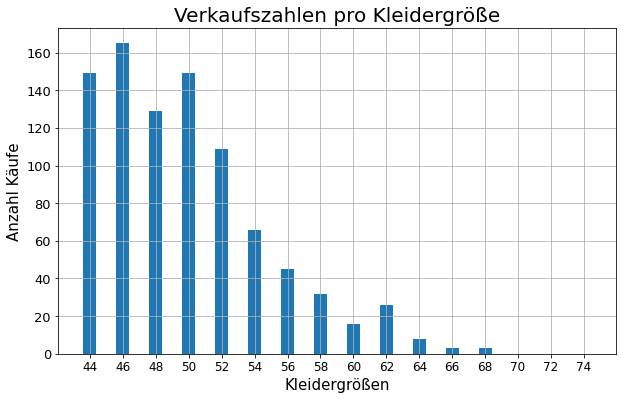

In [115]:
count_by_size = pd.DataFrame()
count_by_size["number_purchased"] = df.groupby("clothing_size").height.count()

plt.figure(figsize=(10, 6))
plt.xlabel('Kleidergrößen', size=15)
plt.ylabel('Anzahl Käufe', size=15)
plt.title("Verkaufszahlen pro Kleidergröße", size=20)
plt.grid()
plt.bar(count_by_size.index, count_by_size.number_purchased, tick_label=count_by_size.index)
plt.xticks(size=12)
plt.yticks(size=13)

plt.show()

## 3. Ermitteln des Frauenanteils der Käufer

Da wir die Verteilung selbst erstellt haben, wissen wir, dass von den 600 Käufern 300 Frauen waren.

Aber wir können diese Information auch aus der Verteilung selbst ableiten.

Dazu schauen wir uns nochmal die Normalverteilungen der Körpergrößen an:

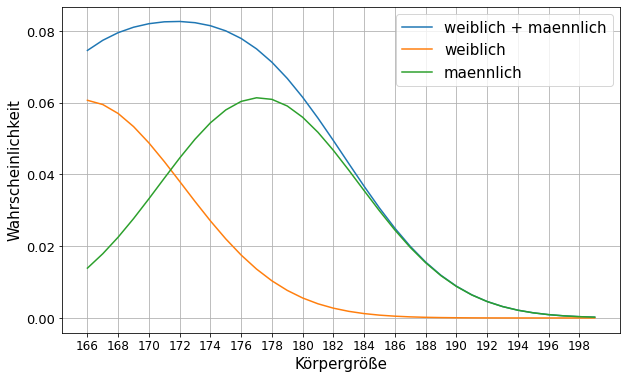

In [120]:
x_axis = np.arange(166, 200, 1)
plt.figure(figsize=(10, 6))
plt.xlabel('Körpergröße', size=15)
plt.ylabel('Wahrscheinlichkeit', size=15)
plt.plot(x_axis, norm.pdf(x_axis, mean_f, variance_f)+norm.pdf(x_axis, mean_m, variance_m), label="weiblich + maennlich")
plt.plot(x_axis, norm.pdf(x_axis, mean_f, variance_f), label="weiblich")
plt.plot(x_axis, norm.pdf(x_axis, mean_m, variance_m), label="maennlich")
plt.xticks(np.arange(166, 200, 2),size=12)
plt.yticks(size=13)
plt.legend(fontsize=15)
plt.grid()
plt.show()

Da die Verkaufszehlen sich aus einer Überlagerung der Normalverteilungen von Kleidungsgrößen von Männern und Frauen zusammensetzen, können wir diese durch eine Überlagerung der Normalverteilungen der Körpergrößen annähern (blaue Linie im Diagramm). 

(Man beachte dabei, dass die Fläche unter der Frauenverteilung 200 Kunden darstellt. Da diese Verteilung ab 166cm abgeschnitten wird, muss etwa die Hälfte dieser Verteilung 200 Kunden beinhalten, während fast die gesamte Verteilung der Männer 400 Kunden beinhaltet. Entsprechend ist es zu erwarten, dass beide Kurven etwa gleich hoch sein sollten. Dies ist jedoch nur eine Näherung, die nur der Erläuterung dient.)

In der Realität haben wir das Problem, dass wir die Höhe der Frauenkurve (orange Lnie) nicht haben. Wir haben nur die durch die Verkaufszahlen angenäherte blaue Kurve (Überlagerung). 

Wir können jedoch erkennen, dass die blaue Kurve zwischen 180cm und 202cm fast vollständig der Normalverteilung der Männer entspricht, weil die Normalverteilung der Frauen ab 180cm fast keinen Beitrag mehr zur Überlagerung leistet. 

Es bietet sich also an die grüne Kurve (Männerverteilung) anhand der rechten Seite der blauen Kurve (ab 180cm) anzunähern.

Durch die richtige Gewichtung der grünen Kurve könnte man dann aus dieser die Verteilung der Kleidergrößen der Männer machen.

Aus dieser könnte man dann für jede Kleidergröße den Anteil der Männer an den Gesamtkäufern bestimmen.

Wenn man diesen über alle Kleidergrößen aufsummiert, erhält man die gesamte Anzahl mänlicher Käufer.

Durch Abziehen der mänlichen Käufer von der Gesamtanzahl erhält man schließlich die Weiblichen Käufer.

## 3.1 Annähern der Normalverteilung der Kleidungsgrößen der Männer anhand der rechten Seite der Verkaufszahlen (ab 180cm oder Größe 52) mittels der Methode der kleinsten Fehlerquadrate

Dafür müssen wir zuerst den Kleidungsgrößen die jeweils passende Körpergröße zuordnen. Dafür nehmen wir jeweils den Durchschnitt des Körpergrößenbereichs der Kleidungsgröße:

In [121]:
# assigning average heights to the respective clothing sizes

avg_height_per_size = [ (j + height_ranges_per_size[i+1])/2 for i,j in enumerate(height_ranges_per_size[:-1]) ]
count_by_size["avg_height"] = avg_height_per_size
count_by_size

,number_purchased,avg_height
clothing_size,,
44,149,167.50
46,165,170.50
48,129,173.50
50,149,176.50
52,109,179.50
54,66,182.00
56,45,184.00
58,32,185.75
60,16,187.25


Nun können wir mit der Annäherung mittels kleinster Fehlerquadrate beginnen (ab Kleidergröße >= 54):

In [126]:
# fitting the normal distribution via least_squares

from scipy.optimize import least_squares


x = count_by_size.loc[52:].avg_height
y = count_by_size.loc[52:].number_purchased

def male_purchase_dist(x):
    return norm.pdf(x, mean_m, variance_m)

def residual(theta, x, y):
    return male_purchase_dist(x) * theta - y

solution = least_squares(residual, 10.0, args=(x,y))


print(f"Als Ergebnis der Näherung erhalten wir {round(solution.x[0])} als Multiplikator der Normalverteilung.")


Als Ergebnis der Näherung erhalten wir 1566 als Multiplikator der Normalverteilung.


## 3.2 Visualisieren des Ergebnisses

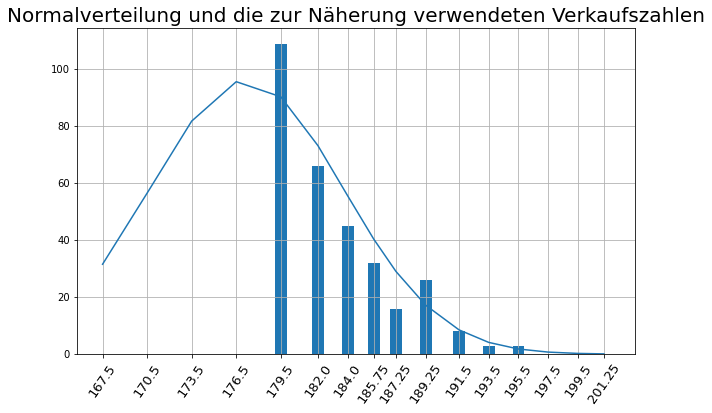

In [143]:
# plotting the resulting distribution using the result from above


plt.figure(figsize=(10, 6))
plt.title("Normalverteilung und die zur Näherung verwendeten Verkaufszahlen", size=20)
plt.bar(count_by_size.loc[52:].avg_height, count_by_size.loc[52:].number_purchased)
plt.plot(count_by_size.avg_height, solution.x * norm.pdf(count_by_size.avg_height, mean_m, variance_m))
plt.xticks(ticks=count_by_size.avg_height, labels=count_by_size.avg_height, rotation=55, size=13)
plt.grid()
plt.show()


## 3.3 Berechnen der Anzahl weiblicher Käufer durch Abziehen der Summe mänlicher Käufer von der Gesamtanzahl aller Käufer

In [139]:
sum_males = (norm.pdf(count_by_size.avg_height, mean_m, variance_m).sum() * solution.x)[0].round()

print(f"Das Aufsummieren der männlichen Käufer ergibt nach der ermittelten Normalverteilung der zugehörigen Verkaufszahlen einen Wert von {sum_males}.")
print()
print(f"Damit ergibt sich für die Anzahl weiblicher Käufer ein Wert von {900 - sum_males}.")

Das Aufsummieren der männlichen Käufer ergibt nach der ermittelten Normalverteilung der zugehörigen Verkaufszahlen einen Wert von 587.0.

Damit ergibt sich für die Anzahl weiblicher Käufer ein Wert von 313.0.


## 3.4 Vergleich der Summe der berechneten Normalverteilungen mit den generierten Verkaufszahlen (unter der Annahme, dass die Maximalwerte der männliche und der weiblichen Verteilung gleich sind)

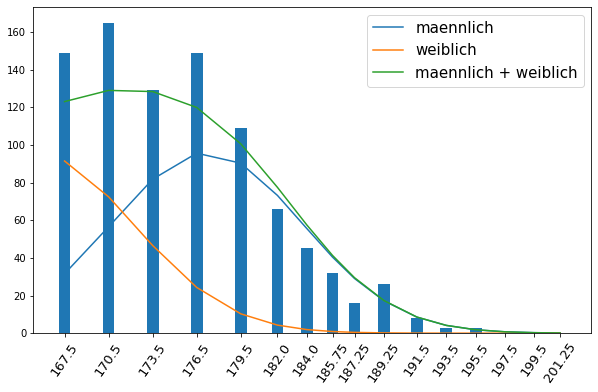

In [142]:

plt.figure(figsize=(10, 6))
plt.bar(count_by_size.avg_height, count_by_size.number_purchased)
plt.plot(count_by_size.avg_height, solution.x * norm.pdf(count_by_size.avg_height, mean_m, variance_m), label="maennlich")
plt.plot(count_by_size.avg_height, solution.x * norm.pdf(count_by_size.avg_height, mean_f, variance_f), label="weiblich")
plt.plot(count_by_size.avg_height, solution.x * (norm.pdf(count_by_size.avg_height, mean_f, variance_f)+norm.pdf(count_by_size.avg_height, mean_m, variance_m)), label="maennlich + weiblich")
plt.xticks(ticks=count_by_size.avg_height, labels=count_by_size.avg_height, rotation=55, size=13)
plt.legend(fontsize=15)
plt.show()

## 4. Fazit

Die Methode funktioniert im Prinzip, jedoch ist sie stark von der Qualität der Verteilung der Verkaufszahlen abhängig und damit nur dann zuverlässig, wenn man auf mehrere Tausend Werte zurückgreifen kann.

In unserem Fall von unter Tausend Datensätzen schwankt das Ergebnis stark, wenn man den Bereich der zur Näherung verwendeten Verkaufszahlen weiter rechts beginnt, was eigentlich nicht sein sollte und darauf schließen lässt, dass die Werte dort zu sehr von der theoretisch vorhergesagten Normalverteilung abweichen.

## 5. Fehlerquellen

- Die Annahmen, dass alle Menschen Kleidung in der gleichen Anzahl und mit der gleichen Häufigkeit kaufen, sowie dass sie die Kleidung immer nur für sich selber kaufen, entsprechen nicht der Realität

- Die Wahl der zur Näherung verwendeten Daten hat einen starken Einflus auf das Endergebnis

- Die Aufteilung des Bereichs der Körpergrößen in Kleidungsgrößen erfolgt nicht ganz gleichmäßig (manche Kleidungsgrößen erstrecken sich über einem Bereich von 5cm Körpergröße und andere über 6cm)

- Die Kleidungsgrößen überschneiden sich, was die zugehörigen Bereiche der Körpergrößen angeht (Bereiche mussten verkleinert werden um die Überschneidungen zu entfernen)
